In [1]:
using Plots, Noise

# Loss Functions

This is concerning Polynomial Regression, using the following error functions:

- |X-X̂|⁴
- |X-X̂|⁷

In [2]:
w₁ = 2; w₂ = 3.6; b₁ = 4.5; # For Second degree Polynomial Regression
println("This cell is to set params of original function, that is to be fit.")

This cell is to set params of original function, that is to be fit.


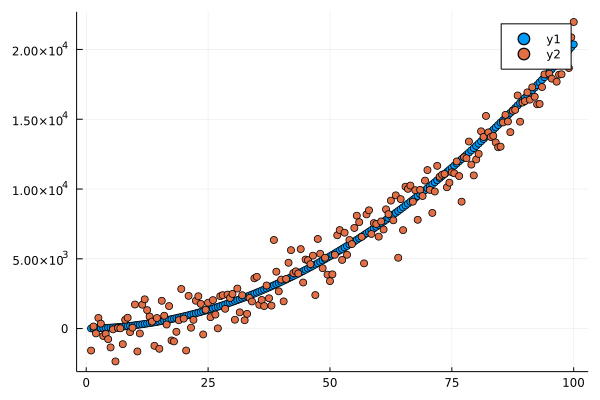

In [3]:
x = collect(1: 0.5: 100)
y = map(x -> w₁*x^2 + w₂*x + b₁, x) # This is just representative, not using noise during comparison to prediction.
y_noise = add_gauss(y, 1000)
plot(x, [y, y_noise], seriestype=:scatter)

In [4]:
f(x, w₁, w₂, b₁) = w₁*x^2 + w₂*x + b₁ # Second Degree Definition
loss(t, ŷ, degree) = (abs(t - ŷ))^degree # Loss Function Definition
println("Defintions of functions")

Defintions of functions


# Polynomial Regression

In [5]:
function poly_grad_a(x, ŷ, y, deg)
    if y > ŷ
        return deg*(y - ŷ)^(deg-1)*(-x^2)
    else
        return deg*(y - ŷ)^(deg-1)*(x^2)
    end
end

function poly_grad_b(x, ŷ, y, deg)
    if y > ŷ
        return deg*(y - ŷ)^(deg-1)*(-x)
    else
        return deg*(y - ŷ)^(deg-1)*(x)
    end
end

function poly_grad_c(x, ŷ, y, deg)
    if y > ŷ
        return deg*(y - ŷ)^(deg-1)*(-1)
    else
        return deg*(y - ŷ)^(deg-1)
    end
end
println("Functions Pre-declarations")

Functions Pre-declarations


In [13]:
function model(x, y, deg, η, upto_error, a, b, c)
    """
    a, b, c are parameters of ax²+bx+c, upto_error is the threshold error value, η is the learning rate, deg is provided for deciding the loss function.
    """
    loss_now = 0
    done = false
    while !done
        for i = 1:length(x)
            ŷ = f(x[i], a, b, c)
            a = a - η * poly_grad_a(x[i], ŷ, y[i], deg)
            b = b - η * poly_grad_b(x[i], ŷ, y[i], deg)
            c = c - η * poly_grad_c(x[i], ŷ, y[i], deg)
            loss_now = loss(y[i], ŷ, deg)
            println("Loss: ", loss_now)
            if loss_now > 1e40 || loss_now == NaN
                return -1, -1, -1, loss_now
            end
            if loss_now < upto_error
                done = true
                break
            end
        end
    end
    return a, b, c, loss_now
end

model (generic function with 1 method)

In [7]:
aᵢ = 0; bᵢ = 0; cᵢ = 0; step_size = 1e-17;
a, b, c, loss_final = model(x, y_noise, 4, step_size, 1, aᵢ, bᵢ, cᵢ)
if a!=-1
    open("polynomial_regression.csv", "a") do file
        write(file, "final params: ($a, $b, $c), loss: $loss_final, initial params: ($aᵢ, $bᵢ, $cᵢ), error function: 4, step size: $step_size\n")
    end
end

Loss: 6.114749660291656e12
Loss: 5.240846448887087e8
Loss: 1.4339810671839457e10
Loss: 3.3955535645974615e11
Loss: 1.6082636914417145e10
Loss: 7.775306118272539e10
Loss: 2.0382887514503746e10
Loss: 3.2732348568411816e11
Loss: 3.3148838350120337e12
Loss: 8.610142046558809e6
Loss: 3.061706402760856e13
Loss: 4.254352553411602e6
Loss: 100258.71519704202
Loss: 1.545468499638569e12
Loss: 1.558353218691323e11
Loss: 3.6328808853853876e11
Loss: 3.996955712579774e9
Loss: 1.8923450460835196e7
Loss: 8.874962134709727e12
Loss: 7.173040193498997e12
Loss: 1.5039601193578558e10
Loss: 8.589498022547867e12
Loss: 1.9332133138634223e13
Loss: 3.061369298677488e12
Loss: 5.591523291016709e11
Loss: 6.389401895349892e10
Loss: 2.3123120490408438e12
Loss: 3.297842189342919e11
Loss: 4.3761267158699575e12
Loss: 1.5750606040597002e13
Loss: 7.228431609082241e11
Loss: 7.312827156983336e9
Loss: 6.764126567097873e12
Loss: 5.1828638244828314e11
Loss: 7.100966251841743e11
Loss: 2.8180183307124643e9
Loss: 1.30730630670838

173

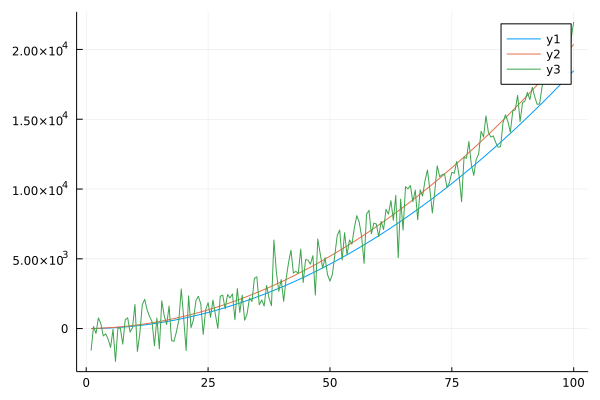

In [8]:
plot(x, [map(x->f(x, a, b, c), x), map(x->f(x, w₁, w₂, b₁), x), y_noise])

In [14]:
aᵢ = 0; bᵢ = 0; cᵢ = 0; step_size = 1e-30
a, b, c, loss_final = model(x, y_noise, 7, step_size, 30, aᵢ, bᵢ, cᵢ)
if a!=-1
    open("polynomial_regression.csv", "a") do file
        write(file, "final params: ($a, $b, $c), loss: $loss_final, initial params: ($aᵢ, $bᵢ, $cᵢ), error function: 7, step size: $step_size\n")
    end
end

Loss: 2.3777308509961328e22
Loss: 1.8153172186223865e15
Loss: 5.942250705028993e17
Loss: 1.5104054062458572e20
Loss: 7.263153589993592e17
Loss: 1.1448684651847064e19
Loss: 1.0995498740040678e18
Loss: 1.4164785605036424e20
Loss: 8.143657555376038e21
Loss: 1.3685552854239844e12
Loss: 3.985070816823039e23
Loss: 3.9858646304482556e11
Loss: 5.651356124704889e8
Loss: 2.142159578549141e21
Loss: 3.8652116313458926e19
Loss: 1.6999923308439205e20
Loss: 6.353298926420183e16
Loss: 5.430821930948516e12
Loss: 4.563481087567889e22
Loss: 3.1439151164041193e22
Loss: 6.457914844435437e17
Loss: 4.309824562946976e22
Loss: 1.782417253755208e23
Loss: 7.086073762428614e21
Loss: 3.616382007879528e20
Loss: 8.123426326129374e18
Loss: 4.335110915855578e21
Loss: 1.43567517614757e20
Loss: 1.3237905623329217e22
Loss: 1.2455136043840105e23
Loss: 5.669849732520741e20
Loss: 1.8322784102570768e17
Loss: 2.8381331596719377e22
Loss: 3.1631299064729194e20
Loss: 5.48814807289848e20
Loss: 3.4336658400606644e16
Loss: 2.846588

176

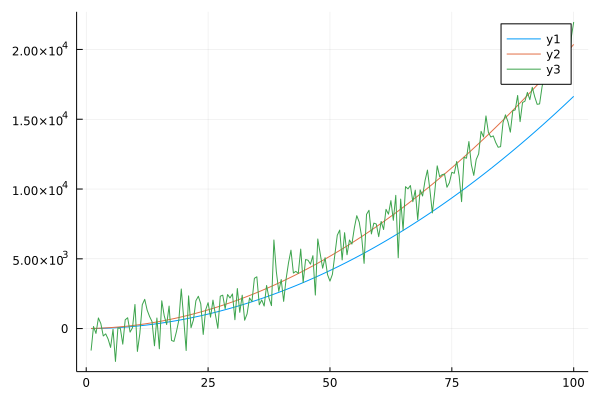

In [15]:
plot(x, [map(x->f(x, a, b, c), x), map(x->f(x, w₁, w₂, b₁), x), y_noise])